In [1]:
library(tidyverse)
library(lme4)
library(lmerTest)
library(MASS)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The fo

In [18]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation/post_processed/pyr_int_df.csv')
summary(data)

       X          Unnamed..0                      session        tetrode    
 Min.   :   0   Min.   :   0   LEM3124_S20190302163218: 142   TT6.mat:1169  
 1st Qu.:2128   1st Qu.:2128   LEM3206_S20190719140644: 119   TT4.mat:1017  
 Median :4256   Median :4256   LEM3206_S20190718143924: 118   TT7.mat: 995  
 Mean   :4256   Mean   :4256   LEM3206_S20190717140525: 117   TT1.mat: 979  
 3rd Qu.:6384   3rd Qu.:6384   LEM3206_S20190720132154: 113   TT2.mat: 953  
 Max.   :8512   Max.   :8512   LEM3216_S20190718101925: 113   TT3.mat: 887  
                               (Other)                :7791   (Other):2513  
      cell        acg_tau_decay     acg_tau_rise         acg_c         
 Min.   :  0.00   Min.   :  1.00   Min.   : 0.1000   Min.   :  0.0601  
 1st Qu.:  3.00   1st Qu.:  8.65   1st Qu.: 0.7544   1st Qu.:  9.8059  
 Median :  6.00   Median : 18.69   Median : 1.6498   Median : 19.7976  
 Mean   : 23.89   Mean   : 65.51   Mean   : 3.5145   Mean   : 30.4148  
 3rd Qu.: 12.00   3rd Qu

## kick out units with < 100 spikes

In [19]:
data = data[data$n_spikes >= 100 & data$n_ripples >= 50,]

In [20]:
data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

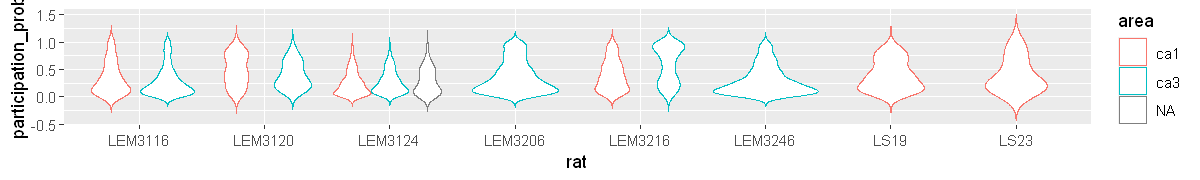

In [5]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(data, aes(x=rat, y=participation_prob, color=area)) +
    geom_violin(trim=FALSE)
p

# ca1 pyr

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,29294.28,29303.64,-14645.14,29290.28,NA,NA,NA
m1,3,29291.54,29305.58,-14642.77,29285.54,4.739425,1,0.02947892


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: participation_prob_trans ~ group + (1 | session)
   Data: data[data$cell_type == "pyr" & data$area == "ca1", ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
 29291.5  29305.6 -14642.8  29285.5      795 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-15.2473  -3.2507   0.1896   3.2383  15.8450 

Random effects:
 Groups  Name        Variance Std.Dev.
 session (Intercept) 0.1468   0.3832  
Number of obs: 798, groups:  session, 27

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.7674     0.1284   5.975  2.3e-09 ***
grouppae      0.3676     0.1590   2.311   0.0208 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.808

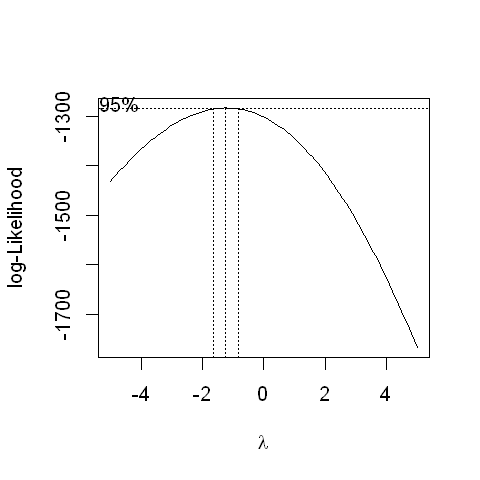

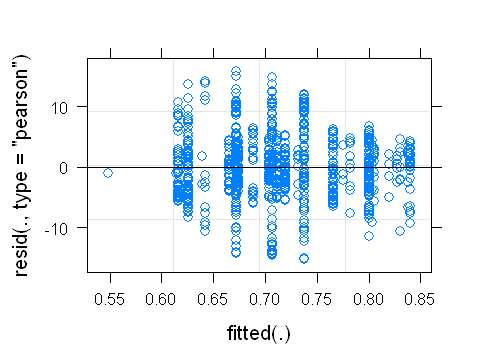

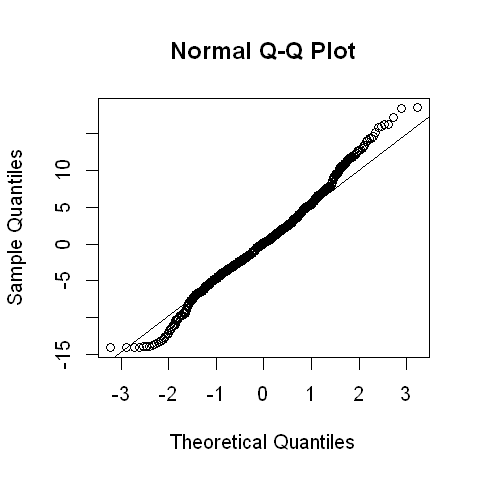

In [42]:
# data$participation_prob_trans = log(data$participation_prob+1)
data$participation_prob_trans = data$participation_prob+1

m1 = lm(participation_prob_trans ~ group, data = data[data$cell_type == "pyr" & data$area == "ca1",])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$participation_prob_trans = data$participation_prob_trans^lambda


m1 = glmer(participation_prob_trans ~ group + (1|session), weights=n_ripples, data[data$cell_type == "pyr" & data$area == "ca1",], family="binomial")
m1.null = glmer(participation_prob_trans ~ 1 + (1 | session), weights=n_ripples, data = data[data$cell_type == "pyr" & data$area == "ca1",], family="binomial")
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

# ca1 int

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,2,22572.41,22580.01,-11284.20,22568.41,NA,NA,NA
m1,3,22570.43,22581.82,-11282.21,22564.43,3.981615,1,0.04599944


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: participation_prob_trans ~ group + (1 | session)
   Data: data[data$cell_type == "int" & data$area == "ca1", ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
 22570.4  22581.8 -11282.2  22564.4      327 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-27.6135  -4.6469   0.9279   4.9425  19.3212 

Random effects:
 Groups  Name        Variance Std.Dev.
 session (Intercept) 0.572    0.7563  
Number of obs: 330, groups:  session, 25

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.1289     0.2701   0.477   0.6332  
grouppae      0.6776     0.3281   2.065   0.0389 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.823

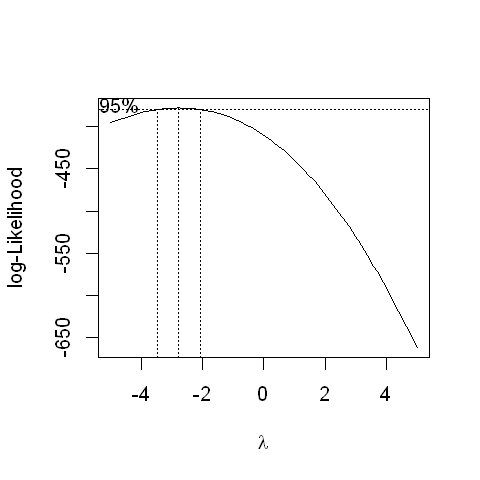

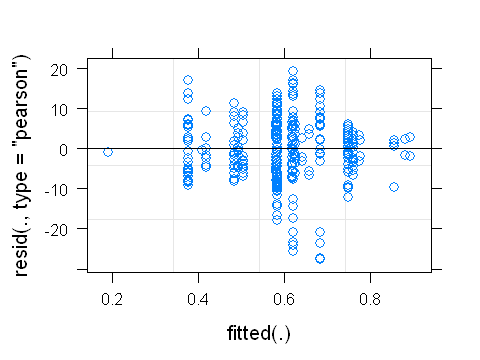

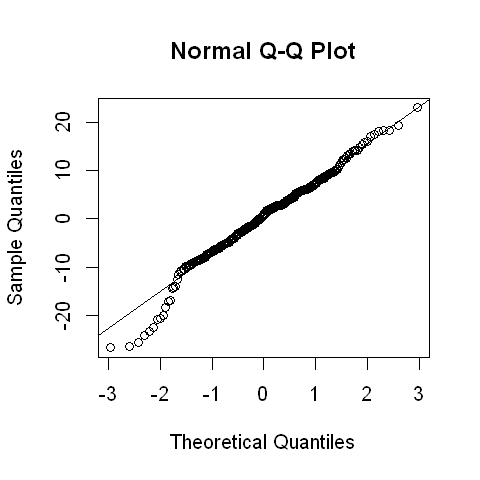

In [39]:
# data$participation_prob_trans = log(data$participation_prob+1)
data$participation_prob_trans = data$participation_prob+1

m1 = lm(participation_prob_trans ~ group, data = data[data$cell_type == "int" & data$area == "ca1",])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$participation_prob_trans = data$participation_prob_trans^lambda


m1 = glmer(participation_prob_trans ~ group + (1 | session), weights=n_ripples, data[data$cell_type == "int" & data$area == "ca1",], family="binomial")
m1.null = glmer(participation_prob_trans ~ 1 + (1 | session), weights=n_ripples, data = data[data$cell_type == "int" & data$area == "ca1",], family="binomial")
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

# ca3 pyr

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,92281.99,92299.37,-46138.0,92275.99,NA,NA,NA
m1,4,92282.20,92305.37,-46137.1,92274.20,1.789466,1,0.1809912


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: participation_prob_trans ~ group + (1 | rat/session)
   Data: data[data$cell_type == "pyr" & data$area == "ca3", ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
 92282.2  92305.4 -46137.1  92274.2     2416 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-21.0085  -3.4941  -0.8347   3.3706  25.0179 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.07772  0.2788  
 rat         (Intercept) 0.08523  0.2919  
Number of obs: 2420, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.7199     0.1908  -3.773 0.000161 ***
grouppae     -0.3730     0.2583  -1.444 0.148713    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.739

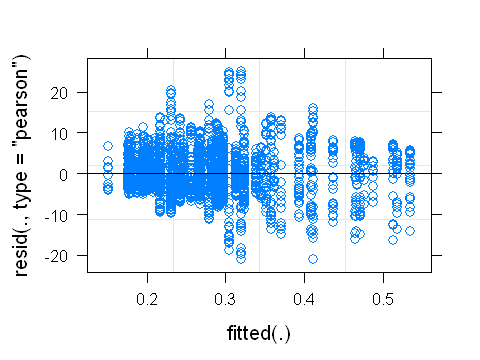

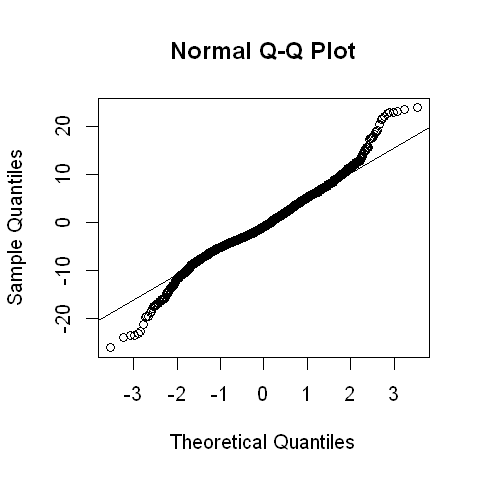

In [60]:
data$participation_prob_trans = log(data$participation_prob+1)

m1 = glmer(participation_prob_trans ~ group + (1|rat/session), weights=n_ripples, data[data$cell_type == "pyr" & data$area == "ca3",], family="binomial")
m1.null = glmer(participation_prob_trans ~ 1 + (1 | rat/session), weights=n_ripples, data = data[data$cell_type == "pyr" & data$area == "ca3",], family="binomial")
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

# ca3 int

Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"Warning message in eval(family$initialize, rho):
"non-integer #successes in a binomial glm!"

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,34627.91,34642.83,-17310.95,34621.91,NA,NA,NA
m1,4,34628.33,34648.23,-17310.16,34620.33,1.581794,1,0.2085024


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: participation_prob_trans ~ group + (1 | rat/session)
   Data: data[data$cell_type == "int" & data$area == "ca3", ]
Weights: n_ripples

     AIC      BIC   logLik deviance df.resid 
 34628.3  34648.2 -17310.2  34620.3     1065 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-17.5405  -3.5604  -0.9555   3.0104  26.5526 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.1359   0.3686  
 rat         (Intercept) 0.1683   0.4103  
Number of obs: 1069, groups:  session:rat, 63; rat, 6

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.6529     0.2682  -2.434   0.0149 *
grouppae     -0.4978     0.3623  -1.374   0.1694  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.740

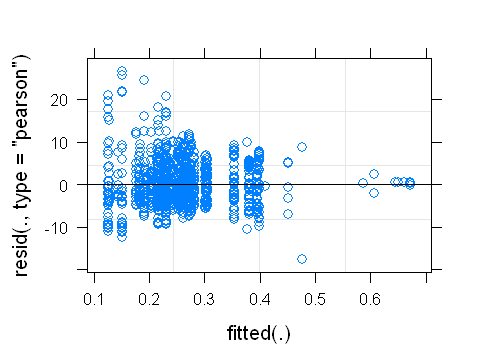

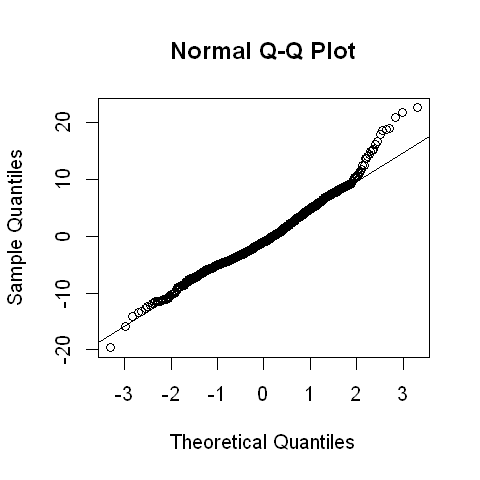

In [54]:
data$participation_prob_trans = log(data$participation_prob+1)

m1 = glmer(participation_prob_trans ~ group + (1|rat/session), weights=n_ripples, data[data$cell_type == "int" & data$area == "ca3",], family="binomial")
m1.null = glmer(participation_prob_trans ~ 1 + (1 | rat/session), weights=n_ripples, data = data[data$cell_type == "int" & data$area == "ca3",], family="binomial")
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

# compare ripple modulation strength

Warning message:
"Removed 8 rows containing non-finite values (stat_ydensity)."

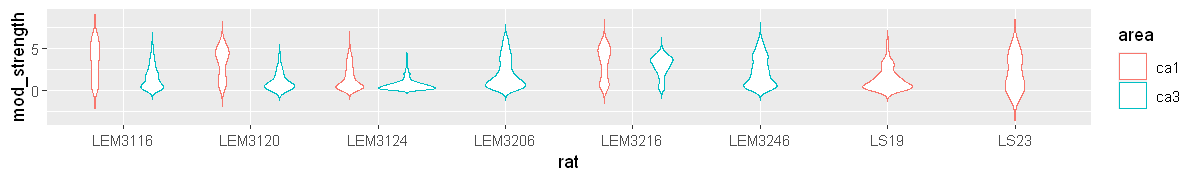

In [130]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(data, aes(x=rat, y=mod_strength, color=area)) +
    geom_violin(trim=FALSE)
p

boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,2908.863,2927.592,-1450.432,2900.863,NA,NA,NA
m1,5,2901.050,2924.460,-1445.525,2891.050,9.813573,1,0.001732286


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: mod_strength_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  2901.0   2924.5  -1445.5   2891.0      793 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.92105 -0.67351  0.00445  0.68724  2.87220 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.6718   0.8196  
 rat         (Intercept) 0.0000   0.0000  
 Residual                2.0528   1.4328  
Number of obs: 798, groups:  session:rat, 27; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   3.3131     0.2890 23.2049  11.464 4.89e-11 ***
grouppae     -2.1253     0.3684 25.6269  -5.769 4.72e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.785
opti

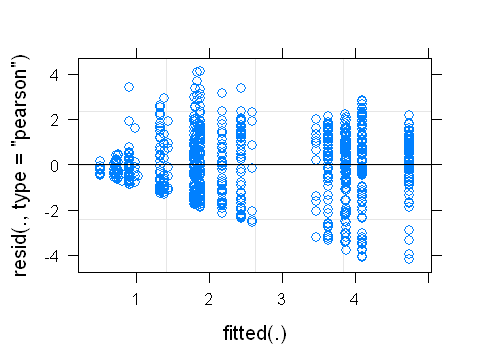

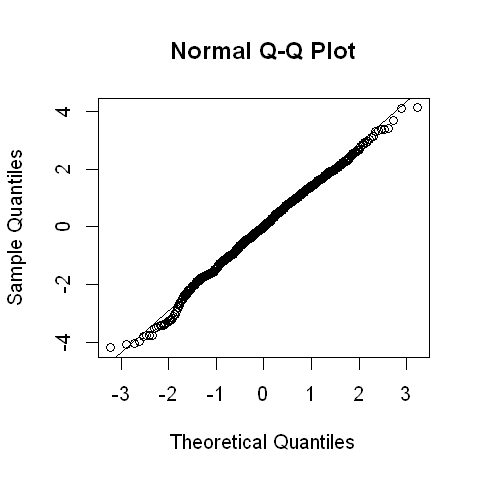

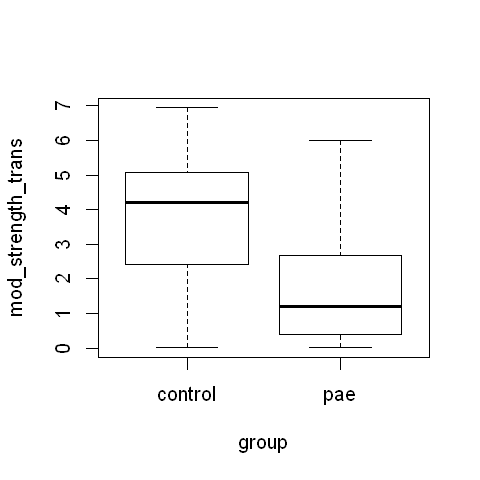

In [132]:
data$mod_strength_trans <- (data$mod_strength)

m1 = lmer(mod_strength_trans ~ group + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='pyr',],REML=FALSE)
m1.null = lmer(mod_strength_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(mod_strength_trans ~ group, data = data[data$area == "ca1" & data$cell_type=='pyr',])


boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,1143.699,1158.883,-567.8494,1135.699,NA,NA,NA
m1,5,1139.251,1158.231,-564.6254,1129.251,6.447894,1,0.01110839


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: mod_strength_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
  1139.3   1158.2   -564.6   1129.3      324 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1651 -0.6024 -0.2072  0.3431  3.0642 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.2629   0.5127  
 rat         (Intercept) 0.0000   0.0000  
 Residual                1.6872   1.2989  
Number of obs: 329, groups:  session:rat, 25; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   1.9571     0.2299 21.0129   8.512 2.99e-08 ***
grouppae     -1.1477     0.2897 24.3873  -3.962 0.000566 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.794
optimizer (nlo

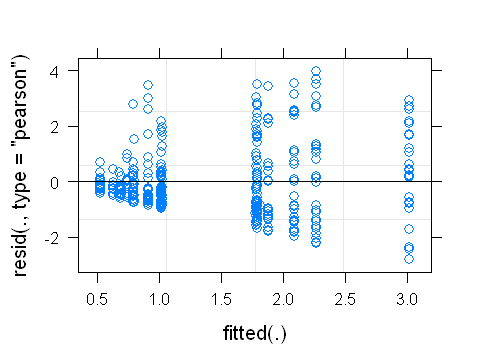

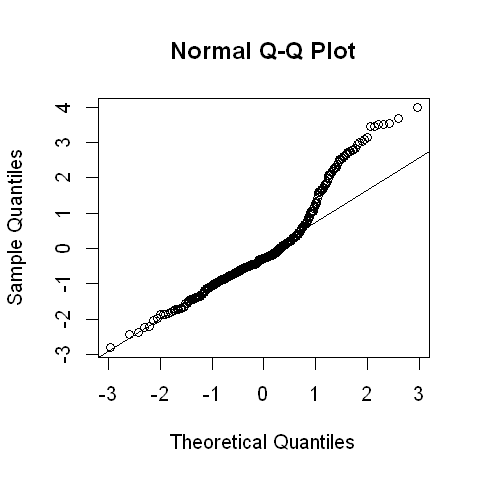

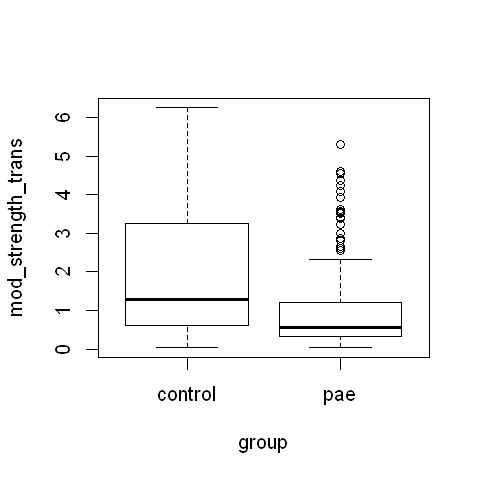

In [133]:
data$mod_strength_trans <- (data$mod_strength)

m1 = lmer(mod_strength_trans ~ group + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='int',],REML=FALSE)
m1.null = lmer(mod_strength_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(mod_strength_trans ~ group, data = data[data$area == "ca1" & data$cell_type=='int',])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,3550.976,3574.138,-1771.488,3542.976,NA,NA,NA
m1,5,3552.578,3581.530,-1771.289,3542.578,0.3980864,1,0.5280792


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: mod_strength_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  3552.6   3581.5  -1771.3   3542.6     2412 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.70436 -0.70681  0.00418  0.69028  2.32713 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.02210  0.1487  
 rat         (Intercept) 0.06467  0.2543  
 Residual                0.24227  0.4922  
Number of obs: 2417, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   0.9832     0.1576  6.6549   6.238 0.000525 ***
grouppae     -0.1406     0.2171  6.1113  -0.648 0.540627    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.726

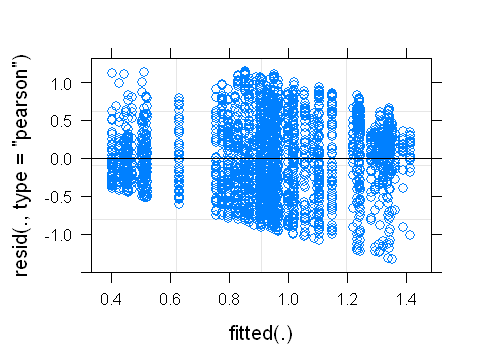

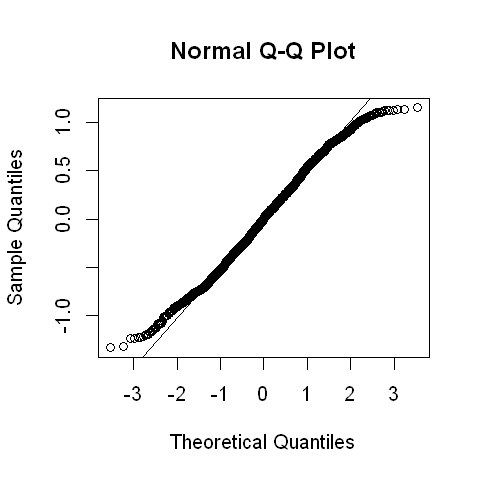

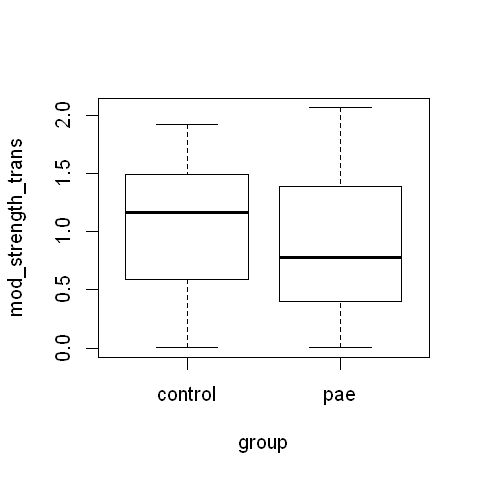

In [139]:
data$mod_strength_trans <- log(data$mod_strength+1)

m1 = lmer(mod_strength_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='pyr',],REML=FALSE)
m1.null = lmer(mod_strength_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(mod_strength_trans ~ group, data = data[data$area == "ca3" & data$cell_type=='pyr',])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,1777.162,1797.045,-884.5811,1769.162,NA,NA,NA
m1,5,1779.162,1804.016,-884.5810,1769.162,7.4755e-05,1,0.9931015


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: mod_strength_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
  1779.2   1804.0   -884.6   1769.2     1060 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.30294 -0.76247 -0.03148  0.74632  2.60314 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.02197  0.1482  
 rat         (Intercept) 0.07229  0.2689  
 Residual                0.29053  0.5390  
Number of obs: 1065, groups:  session:rat, 63; rat, 6

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  1.075518   0.173875  6.265988   6.186 0.000696 ***
grouppae    -0.002037   0.234978  5.328204  -0.009 0.993397    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -

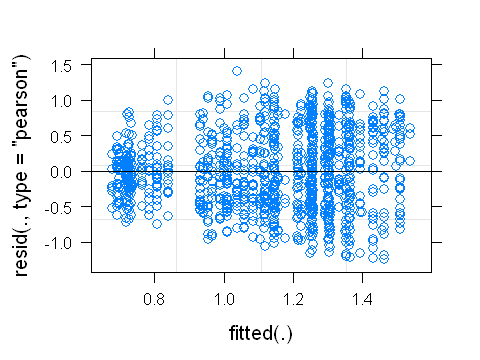

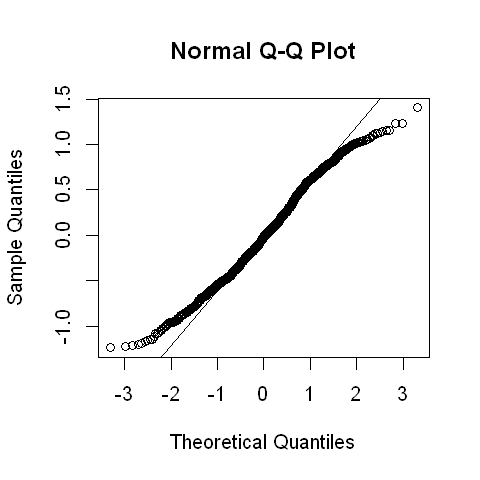

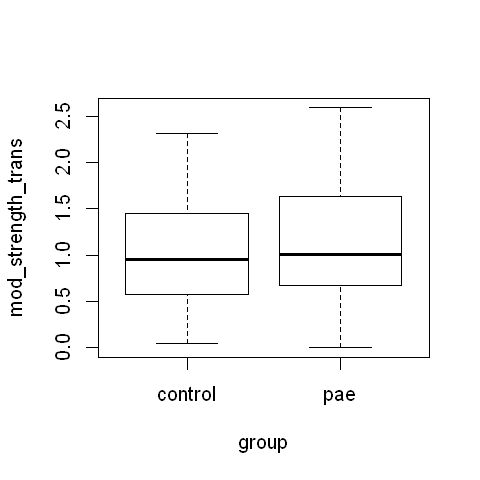

In [144]:
data$mod_strength_trans <- sqrt(data$mod_strength)

m1 = lmer(mod_strength_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='int',],REML=FALSE)
m1.null = lmer(mod_strength_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(mod_strength_trans ~ group, data = data[data$area == "ca3" & data$cell_type=='int',])


# read in and analyze phase data

In [198]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/ripple_modulation_phase/post_processed/pyr_int_df.csv')
summary(data)

       X          Unnamed..0                      session        tetrode    
 Min.   :   0   Min.   :   0   LEM3124_S20190302163218: 138   TT6.mat:1166  
 1st Qu.:2194   1st Qu.:2194   LEM3206_S20190719140644: 119   TT4.mat:1013  
 Median :4309   Median :4309   LEM3206_S20190718143924: 118   TT7.mat: 995  
 Mean   :4288   Mean   :4288   LEM3206_S20190717140525: 117   TT1.mat: 963  
 3rd Qu.:6410   3rd Qu.:6410   LEM3206_S20190720132154: 113   TT2.mat: 934  
 Max.   :8512   Max.   :8512   LEM3216_S20190718101925: 113   TT3.mat: 882  
                               (Other)                :7689   (Other):2454  
      cell        acg_tau_decay     acg_tau_rise         acg_c         
 Min.   :  0.00   Min.   :  1.00   Min.   : 0.1000   Min.   :  0.0601  
 1st Qu.:  3.00   1st Qu.:  8.73   1st Qu.: 0.7538   1st Qu.:  9.8573  
 Median :  6.00   Median : 18.77   Median : 1.6387   Median : 19.8720  
 Mean   : 24.14   Mean   : 65.41   Mean   : 3.5098   Mean   : 30.5098  
 3rd Qu.: 12.00   3rd Qu

In [199]:
# data = data[data$n_spikes >= 100 & data$n_ripples >= 50 & data$rayleigh_pval <0.05,]
data = data[data$n_spikes >= 100 & data$n_ripples >= 50,]

In [200]:
data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

Warning message:
"Removed 33 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 33 rows containing missing values (geom_point)."

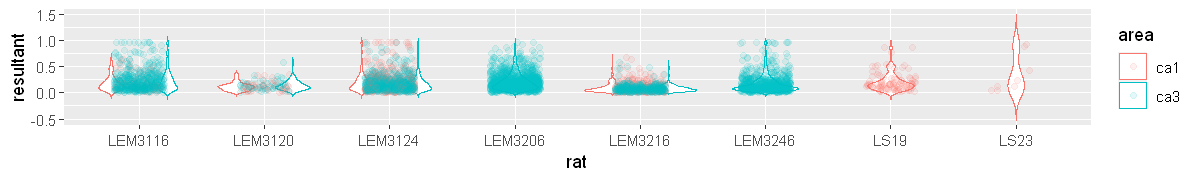

In [201]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(data, aes(x=rat, y=resultant, color=area)) +
    geom_violin(trim=FALSE) +
    geom_jitter(position=position_jitter(0.2),alpha=.1)
p

# ggdotplot(ToothGrowth, x = "dose", y = "len", add = "mean_sd", 
#           fill = "dose", position = position_jitter(0.1))

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,2143.784,2162.498,-1067.892,2135.784,NA,NA,NA
m1,5,2145.387,2168.778,-1067.693,2135.387,0.3975439,1,0.5283604


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  2145.4   2168.8  -1067.7   2135.4      790 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2754 -0.6045  0.0411  0.5961  4.0752 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.0790   0.2811  
 rat         (Intercept) 0.0949   0.3081  
 Residual                0.8200   0.9055  
Number of obs: 795, groups:  session:rat, 27; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)   
(Intercept)  -1.3925     0.2036  5.0148  -6.838  0.00101 **
grouppae      0.2249     0.3205  3.7377   0.702  0.52407   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.635

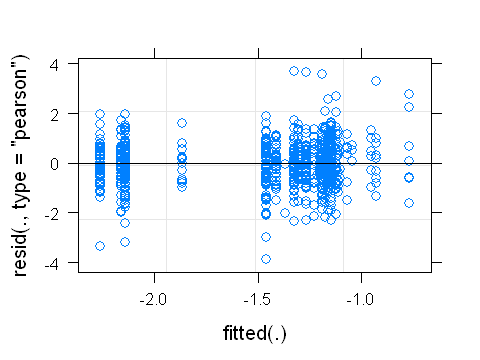

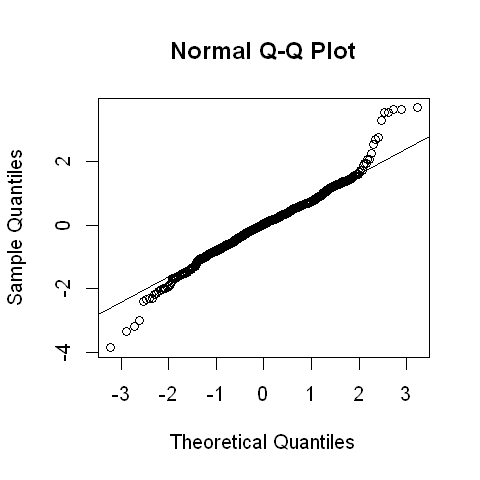

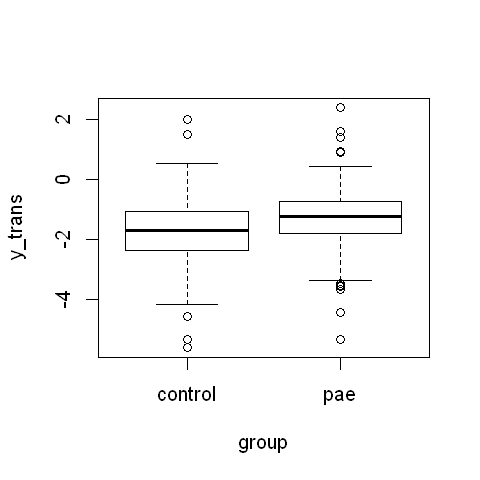

In [207]:
data$y_trans <- log(data$kappa)

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='pyr',],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca1" & data$cell_type=='pyr',])


boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,968.3148,983.4990,-480.1574,960.3148,NA,NA,NA
m1,5,961.5726,980.5529,-475.7863,951.5726,8.742233,1,0.003109235


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
   961.6    980.6   -475.8    951.6      324 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2804 -0.5771 -0.0080  0.5659  4.0021 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.1525   0.3905  
 rat         (Intercept) 0.0000   0.0000  
 Residual                0.9833   0.9916  
Number of obs: 329, groups:  session:rat, 25; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  -1.9398     0.1752 18.8311 -11.071  1.1e-09 ***
grouppae      0.8672     0.2208 21.8858   3.928 0.000725 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.794
optimizer (nloptwrap) con

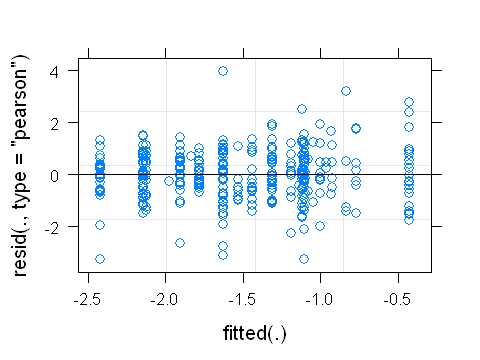

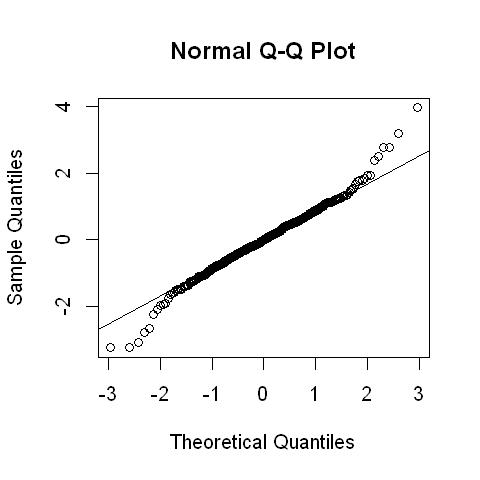

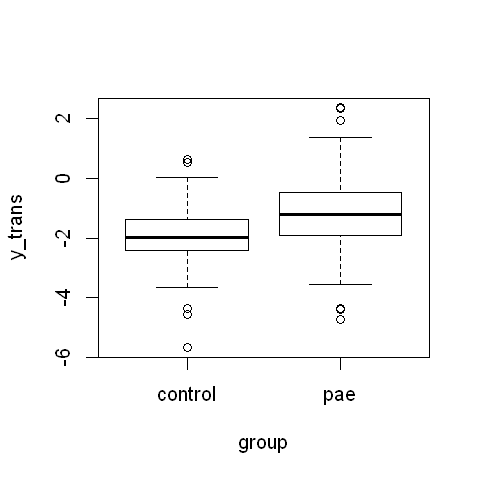

In [208]:
data$y_trans <- log(data$kappa)

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='int',],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca1" & data$cell_type=='int',])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,6317.551,6340.691,-3154.776,6309.551,NA,NA,NA
m1,5,6318.966,6347.890,-3154.483,6308.966,0.5854296,1,0.4441919


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  6319.0   6347.9  -3154.5   6309.0     2399 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9769 -0.5754  0.0383  0.5728  4.0762 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.07921  0.2814  
 rat         (Intercept) 0.11886  0.3448  
 Residual                0.77088  0.8780  
Number of obs: 2404, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  -1.4900     0.2235  7.0568  -6.668 0.000276 ***
grouppae      0.2403     0.3033  6.3038   0.792 0.457004    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.737

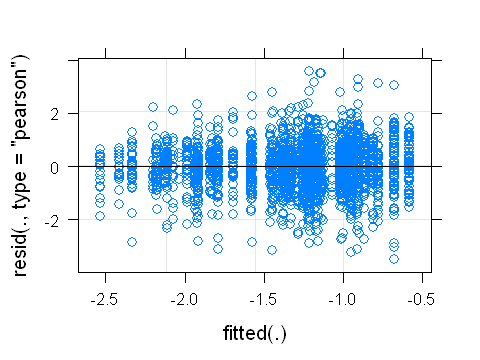

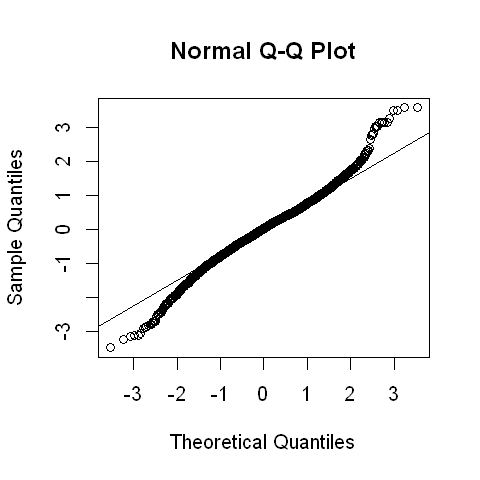

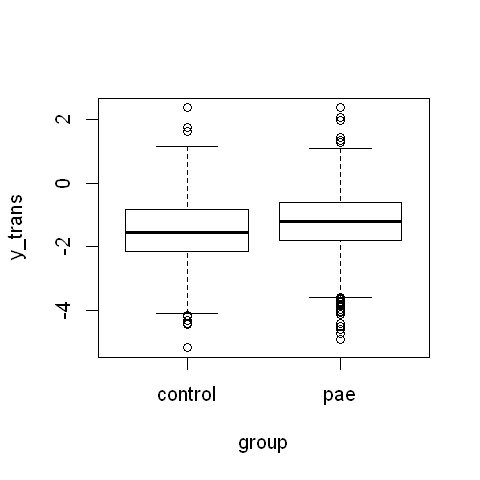

In [213]:
data$y_trans <- log(data$kappa)

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='pyr',],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca3" & data$cell_type=='pyr',])


boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,2947.546,2967.395,-1469.773,2939.546,NA,NA,NA
m1,5,2945.734,2970.545,-1467.867,2935.734,3.811828,1,0.05089189


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
  2945.7   2970.5  -1467.9   2935.7     1051 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5849 -0.5944  0.0184  0.5751  3.8288 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.06082  0.2466  
 rat         (Intercept) 0.00000  0.0000  
 Residual                0.90533  0.9515  
Number of obs: 1056, groups:  session:rat, 63; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  -1.5575     0.1089 98.1478 -14.307   <2e-16 ***
grouppae      0.2412     0.1197 85.5539   2.015   0.0471 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.909
optimizer (nloptwrap) co

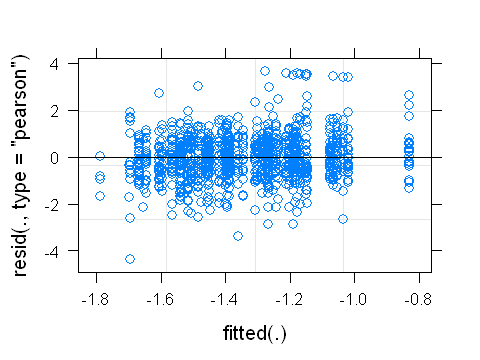

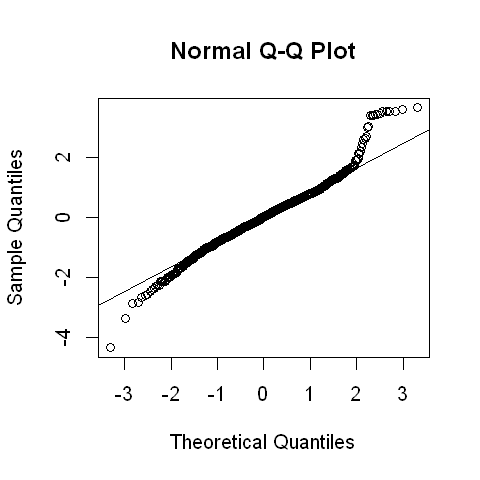

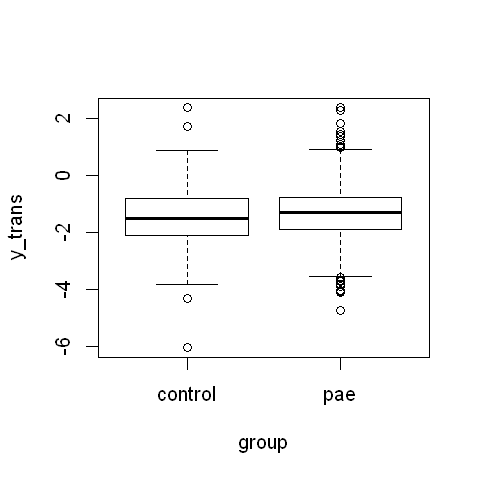

In [214]:
data$y_trans <- log(data$kappa)

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='int',],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca3" & data$cell_type=='int',])


# compare average firing rates

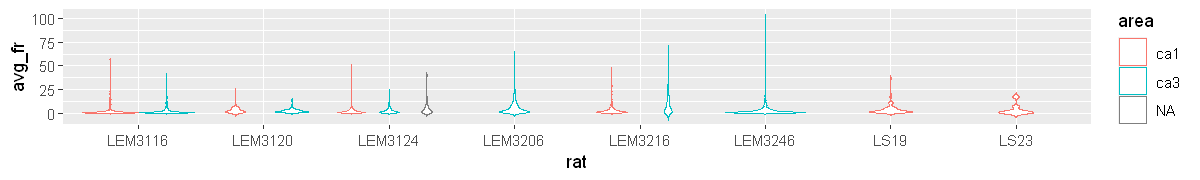

In [10]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(data, aes(x=rat, y=avg_fr, color=area)) +
    geom_violin(trim=FALSE)
p

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,2655.382,2674.110,-1323.691,2647.382,NA,NA,NA
m1,5,2657.169,2680.579,-1323.584,2647.169,0.2132471,1,0.6442342


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  2657.2   2680.6  -1323.6   2647.2      793 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.86230 -0.60240 -0.00405  0.67388  2.93026 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.08324  0.2885  
 rat         (Intercept) 0.05233  0.2287  
 Residual                1.56374  1.2505  
Number of obs: 798, groups:  session:rat, 27; rat, 6

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)
(Intercept)   0.1486     0.1819 4.3047   0.817    0.457
grouppae      0.1405     0.2746 2.9107   0.512    0.645

Correlation of Fixed Effects:
         (Intr)
grouppae -0.663

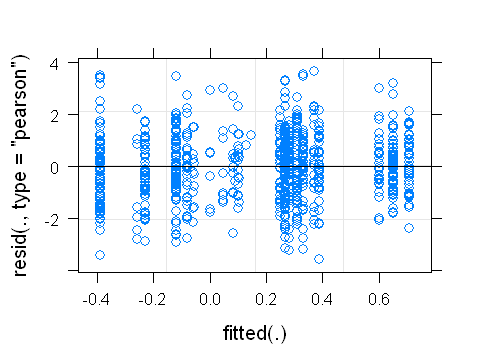

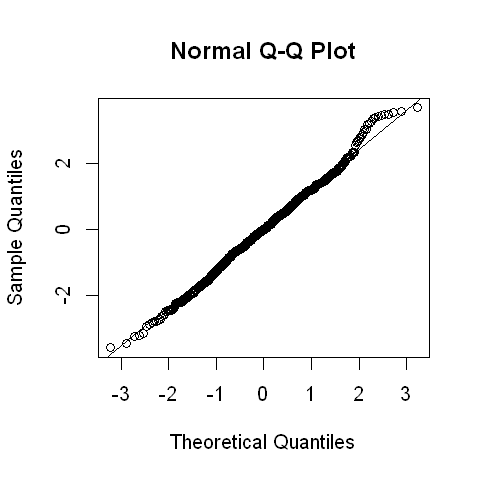

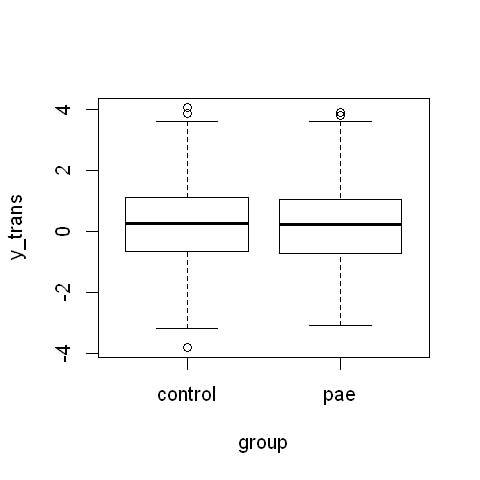

In [12]:
data$y_trans <- log(data$avg_fr)

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='pyr',],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca1" & data$cell_type=='pyr',])


boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,1145.127,1160.324,-568.5637,1137.127,NA,NA,NA
m1,5,1145.988,1164.984,-567.9940,1135.988,1.139363,1,0.285787


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
    1146     1165     -568     1136      325 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7391 -0.6712 -0.1163  0.6362  2.9633 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.2622   0.5121  
 rat         (Intercept) 0.0000   0.0000  
 Residual                1.7053   1.3059  
Number of obs: 330, groups:  session:rat, 25; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)  
(Intercept)   0.4210     0.2300 13.4961   1.830   0.0894 .
grouppae     -0.3110     0.2899 15.7298  -1.073   0.2994  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.794
optimizer (nloptwrap) convergen

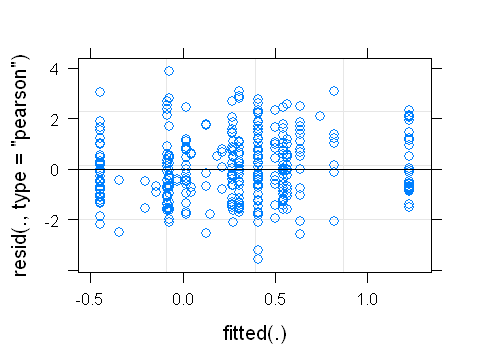

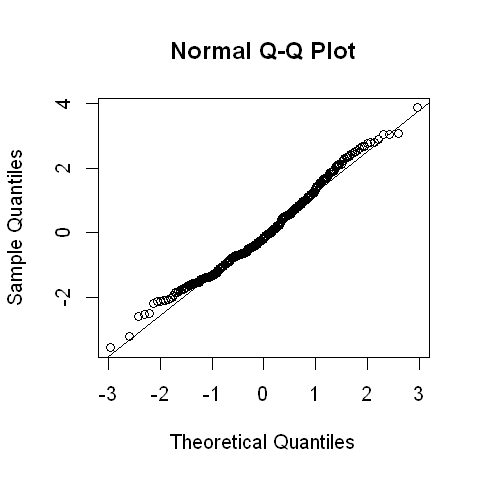

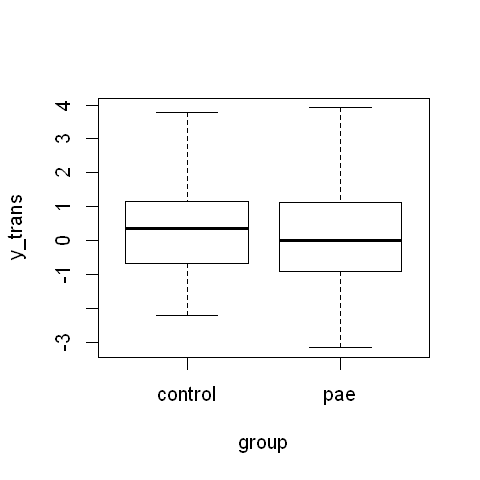

In [14]:
data$y_trans <- log(data$avg_fr)

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='int',],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1" & data$cell_type=='int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca1" & data$cell_type=='int',])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,8327.034,8350.20,-4159.517,8319.034,NA,NA,NA
m1,5,8329.002,8357.96,-4159.501,8319.002,0.0316889,1,0.8587122


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "pyr", ]

     AIC      BIC   logLik deviance df.resid 
  8329.0   8358.0  -4159.5   8319.0     2415 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.04311 -0.66620  0.00655  0.72367  2.82315 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.1436   0.3790  
 rat         (Intercept) 0.2671   0.5169  
 Residual                1.7461   1.3214  
Number of obs: 2420, groups:  session:rat, 68; rat, 6

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)
(Intercept)  0.53332    0.33068  7.13504   1.613    0.150
grouppae    -0.08042    0.45070  6.42012  -0.178    0.864

Correlation of Fixed Effects:
         (Intr)
grouppae -0.734

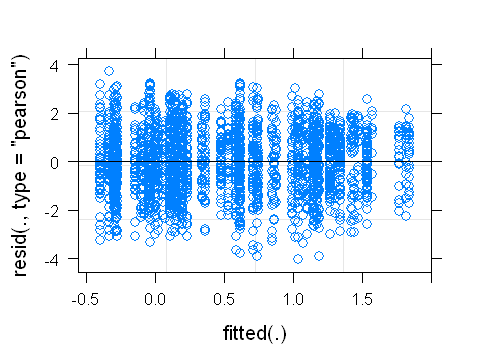

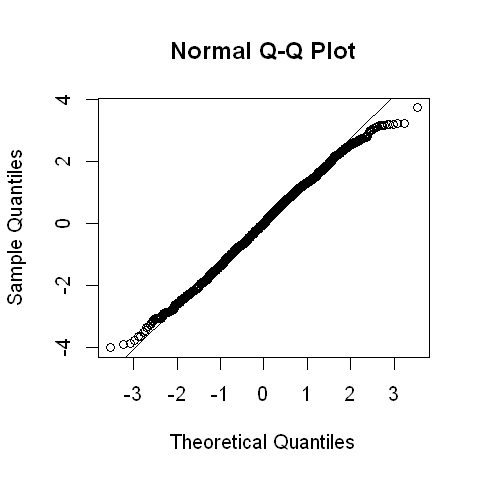

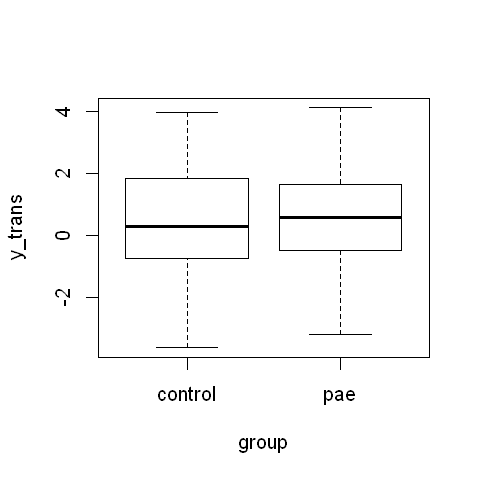

In [15]:
data$y_trans <- log(data$avg_fr)

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='pyr',],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='pyr',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca3" & data$cell_type=='pyr',])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,3844.565,3864.463,-1918.283,3836.565,NA,NA,NA
m1,5,3845.987,3870.859,-1917.994,3835.987,0.5781939,1,0.4470211


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: y_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3" & data$cell_type == "int", ]

     AIC      BIC   logLik deviance df.resid 
  3846.0   3870.9  -1918.0   3836.0     1064 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.07028 -0.67577 -0.00948  0.67017  2.88549 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.1955   0.4421  
 rat         (Intercept) 0.4955   0.7039  
 Residual                1.9811   1.4075  
Number of obs: 1069, groups:  session:rat, 63; rat, 6

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)  
(Intercept)   1.0392     0.4603  6.7578   2.258   0.0599 .
grouppae     -0.4816     0.6198  5.6960  -0.777   0.4682  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.743

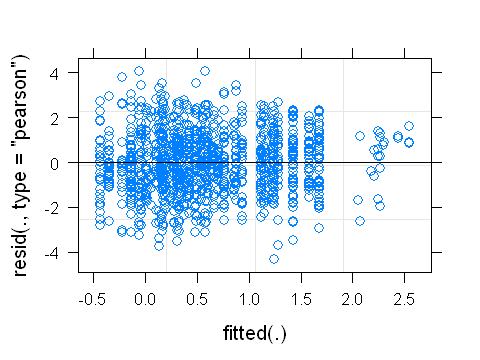

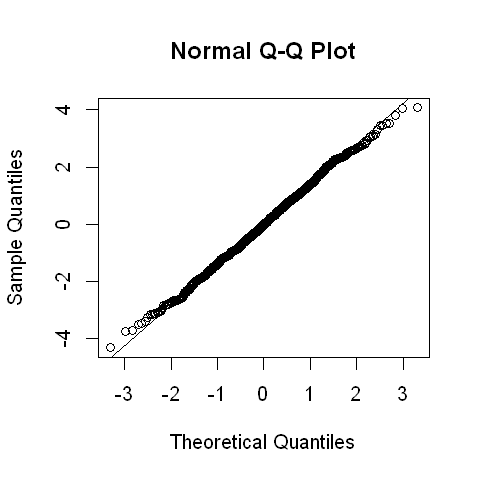

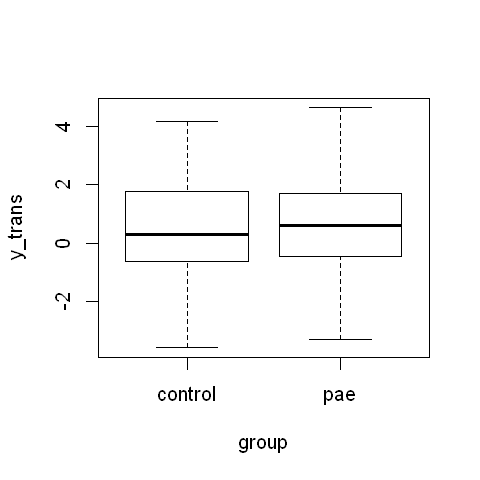

In [13]:
data$y_trans <- log(data$avg_fr)

m1 = lmer(y_trans ~ group + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='int',],REML=FALSE)
m1.null = lmer(y_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3" & data$cell_type=='int',], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(y_trans ~ group, data = data[data$area == "ca3" & data$cell_type=='int',])
